# Combined Charts of our Models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
# load in our files
with open("./results/TargetValues.pkl", "rb") as f:
    target = pickle.load(f)
    
with open("./results/STGCNPredictions.pkl", "rb") as f:
    stgcn_preds = pickle.load(f)

with open("./results/STGCN_metadataPredictions.pkl", "rb") as f:
    stgcn_metadata_preds = pickle.load(f)
    
with open("./results/STGLSTM_metadataPredictions.pkl", "rb") as f:
    stglstm_metadata_preds = pickle.load(f)

target.shape, stgcn_preds.shape, stgcn_metadata_preds.shape, stglstm_metadata_preds.shape

((90, 1487, 23), (90, 1487, 23), (90, 1487, 23), (90, 1487, 23))

Begin Plotting

In [4]:
def plotPredictions(target, stgcn_preds, stgcn_metadata_preds, node, timestep):
    t = target[timestep][node]
    stgcn = stgcn_preds[timestep][node]
    stgcn_meta = stgcn_metadata_preds[timestep][node]
    stglstm_meta = stglstm_metadata_preds[timestep][node]
    
    
    plt.figure(figsize=(14,6))
    plt.title('STGNN Model Predictions Vs. Gold Standard')
    plt.plot(t, label = "Gold Standard Load", color = "gold")
    
    plt.plot(stgcn, label = "STGCN", color = "blue")
    plt.plot(stgcn_meta, label = "STGCN + Metadata", color = "green")
    plt.plot(stglstm_meta, label = "STG-LSTM + Metadata", color = "darkred")
    
    
    plt.xlabel("Timestep (hourly)")
    plt.ylabel("Load Demand")
    plt.legend()
    plt.show()

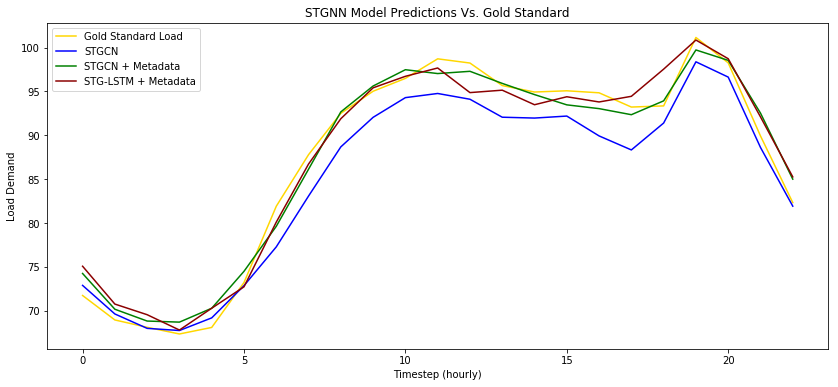

In [38]:
plotPredictions(target, stgcn_preds, stgcn_metadata_preds, 0, 0)

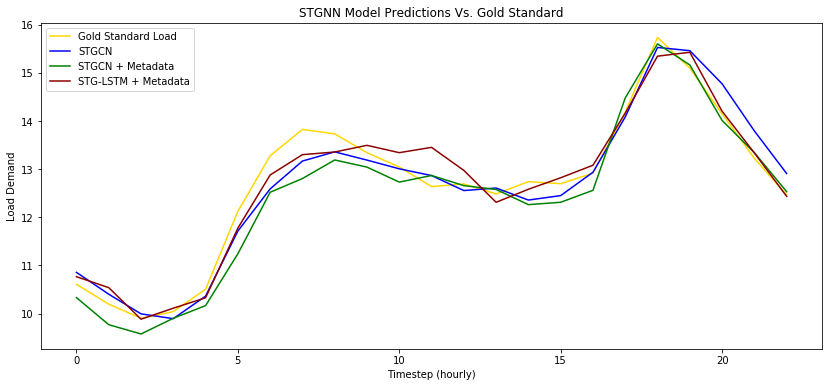

In [6]:
plotPredictions(target, stgcn_preds, stgcn_metadata_preds, 1300, 20)

## Plot node predictions

In [42]:
def plotNodePredictions(target, stgcn_preds, stgcn_metadata_preds, stglstm_metadata_preds, node):
    t = np.mean(target, axis = 0)[node]
    stgcn = np.mean(stgcn_preds, axis = 0)[node]
    stgcn_meta = np.mean(stgcn_metadata_preds, axis = 0)[node]
    stglstm_meta = np.mean(stglstm_metadata_preds, axis = 0)[node]
    
    
    plt.figure(figsize=(14,6))
    plt.title('STGNN Averaged Node Model Predictions Vs. Gold Standard')
    plt.plot(t, label = "Gold Standard Load", color = "gold")
    
    plt.plot(stgcn, label = "STGCN", color = "blue")
    plt.plot(stgcn_meta, label = "STGCN + Metadata", color = "green")
    plt.plot(stglstm_meta, label = "STG-LSTM + Metadata", color = "darkred")
    
    
    plt.xlabel("Timestep (hourly)")
    plt.ylabel("Load Demand")
    plt.legend()
    plt.show()

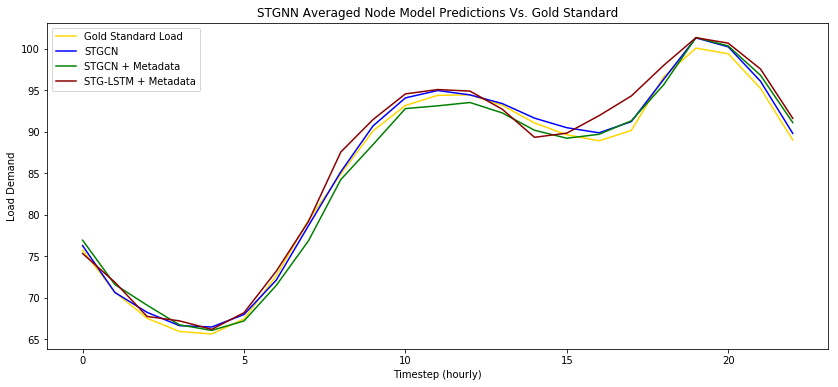

In [43]:
plotNodePredictions(target, stgcn_preds, stgcn_metadata_preds, stglstm_metadata_preds, 0)

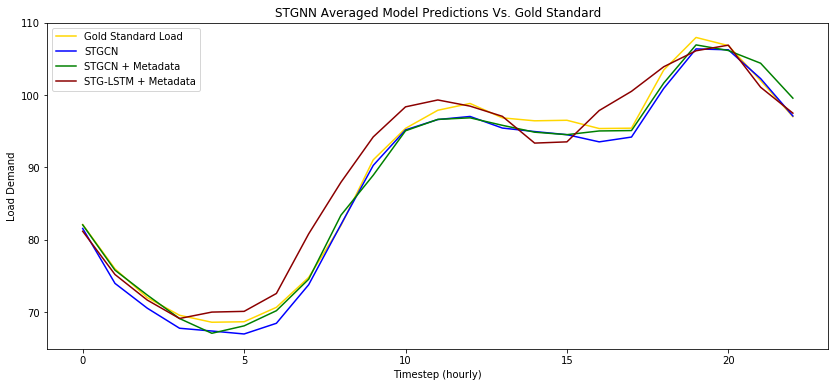

In [30]:
plotNodePredictions(target, stgcn_preds, stgcn_metadata_preds, stglstm_metadata_preds, 4)

## Plot averaged results 

In [13]:
# load in our files
with open("./results/TargetValues_norm.pkl", "rb") as f:
    target_norm = pickle.load(f)
    
with open("./results/STGCNPredictions_norm.pkl", "rb") as f:
    stgcn_preds_norm = pickle.load(f)

with open("./results/STGCN_metadataPredictions_norm.pkl", "rb") as f:
    stgcn_metadata_preds_norm = pickle.load(f)
    
with open("./results/STGLSTM_metadataPredictions_norm.pkl", "rb") as f:
    stglstm_metadata_preds_norm = pickle.load(f)

target_norm.shape, stgcn_preds_norm.shape, stgcn_metadata_preds_norm.shape, stglstm_metadata_preds_norm.shape

((90, 1487, 23), (90, 1487, 23), (90, 1487, 23), (90, 1487, 23))

In [39]:
def plotAvgPredictions(target_norm, stgcn_preds_norm, stgcn_metadata_preds_norm, stglstm_metadata_preds_norm):
    t = np.mean(np.mean(target_norm, axis = 0), axis = 0)
    stgcn = np.mean(np.mean(stgcn_preds_norm, axis = 0), axis = 0)
    stgcn_meta = np.mean(np.mean(stgcn_metadata_preds_norm, axis = 0), axis = 0)
    stglstm_meta = np.mean(np.mean(stglstm_metadata_preds_norm, axis = 0), axis = 0)
    
    
    plt.figure(figsize=(14,6))
    plt.title('STGNN Averaged Total Model Predictions Vs. Gold Standard')
    plt.plot(t, label = "Gold Standard Load", color = "gold")
    
    plt.plot(stgcn, label = "STGCN", color = "blue")
    plt.plot(stgcn_meta, label = "STGCN + Metadata", color = "green")
    plt.plot(stglstm_meta, label = "STG-LSTM + Metadata", color = "darkred")
    
    
    plt.xlabel("Timestep (hourly)")
    plt.ylabel("Load Demand")
    plt.legend()
    plt.show()

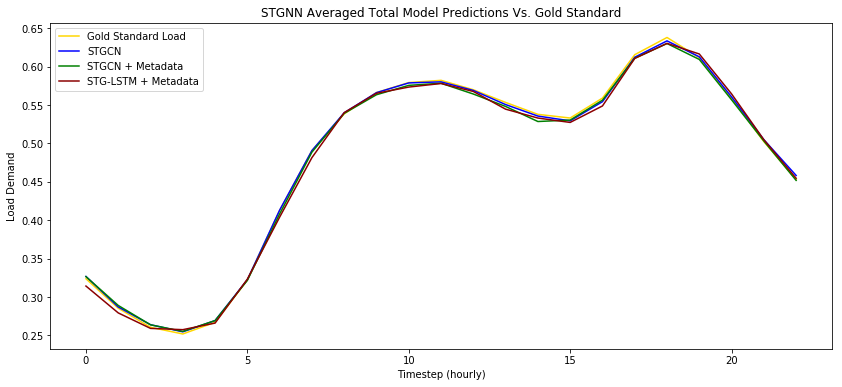

In [40]:
plotAvgPredictions(target_norm, stgcn_preds_norm, stgcn_metadata_preds_norm, stglstm_metadata_preds_norm)